# ANALISI DATI DI TEST

#### Autore: Enrico Brunelli

#### Data ultima modifica: 19/11/2024

### Descrizione:
 I test effettuati sono stati condotti variando i nodi di rete che generano traffico. Tali nodi sono stati generati da lato client connettendo tre distinti moduli Quectel EVB connessi al PC MSI con Windows 11. In tal modo è stato possibile utilizzare la rete dei moduli contemporaneamente. Sono stati implementati tre client tramite il software iperf3. Lato server, sul PC Firecell che contiene il Core Network della rete 5G, sono stati configurati 3 server tramite iperf3 sono 3 distinte porte: 5201 6201 7201.
 Inoltre è stato analizzato l'andamento dei container tramite il comando *docket stats* durante la connessione di 6 distinti User Equipement rappresentati dai moduli Quectel. In tal contesto è stato anche analizzato e catturato il traffico sull'interfaccia *enp5s0* in modo da osservare l'andamento dei pacchetti durante la fase di registrazione sulla rete. 


In [270]:
# Librerie necessarie all'analisi dei dati e la relativa rappresentazione
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ntplib import NTPStats
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator

In [271]:
# Nomi dei file rispettivamente per Client e Server
file_client="test_2_19_11_2024/istanti_temporali_2024-11-19.csv"
file_server="test_2_19_11_2024/server_istanti_temporali_2024-11-19.csv"

df1 = pd.read_csv(file_client) #legge il file del client
df2 = pd.read_csv(file_server) #legge il file del server

# Converto le colonne del file del Client che contengono l'ntp object
print(df1)
print(df2)

      Protocollo  Traffico  client_send_timestamp  client_recv_timestamp
0            TCP         0           1.732030e+09           1.732030e+09
1            TCP         0           1.732030e+09           1.732030e+09
2            TCP         0           1.732030e+09           1.732030e+09
3            TCP         0           1.732030e+09           1.732030e+09
4            TCP         0           1.732030e+09           1.732030e+09
...          ...       ...                    ...                    ...
15966        TCP         0           1.732031e+09           1.732031e+09
15967        TCP         0           1.732031e+09           1.732031e+09
15968        TCP         0           1.732031e+09           1.732031e+09
15969        TCP         0           1.732031e+09           1.732031e+09
15970        TCP         0           1.732031e+09           1.732031e+09

[15971 rows x 4 columns]
      Tipo  server_send_timestamp  server_recv_timestamp
0      TCP           1.732030e+09        

In [272]:
# Unisco i risultati ottenuti lato client con quelli ottenuti lato server

df1['server_send_timestamp']=df2['server_send_timestamp']
df1['server_recv_timestamp']=df2['server_recv_timestamp']
print(df1)

      Protocollo  Traffico  client_send_timestamp  client_recv_timestamp  \
0            TCP         0           1.732030e+09           1.732030e+09   
1            TCP         0           1.732030e+09           1.732030e+09   
2            TCP         0           1.732030e+09           1.732030e+09   
3            TCP         0           1.732030e+09           1.732030e+09   
4            TCP         0           1.732030e+09           1.732030e+09   
...          ...       ...                    ...                    ...   
15966        TCP         0           1.732031e+09           1.732031e+09   
15967        TCP         0           1.732031e+09           1.732031e+09   
15968        TCP         0           1.732031e+09           1.732031e+09   
15969        TCP         0           1.732031e+09           1.732031e+09   
15970        TCP         0           1.732031e+09           1.732031e+09   

       server_send_timestamp  server_recv_timestamp  
0               1.732030e+09     

In [273]:
# Calcolo RTT e OTT 

delay_richiesta_ntp_avg= 0.005
df1['RTT']=(df1['client_recv_timestamp']-df1['server_send_timestamp'])+(df1['server_recv_timestamp']-df1['client_send_timestamp'])-(delay_richiesta_ntp_avg*4)
df1['OTT_send']=df1['server_recv_timestamp']-df1['client_send_timestamp']-(delay_richiesta_ntp_avg*2)
df1['OTT_recv']=df1['client_recv_timestamp']-df1['server_send_timestamp']-(delay_richiesta_ntp_avg*2)
print(df1)

      Protocollo  Traffico  client_send_timestamp  client_recv_timestamp  \
0            TCP         0           1.732030e+09           1.732030e+09   
1            TCP         0           1.732030e+09           1.732030e+09   
2            TCP         0           1.732030e+09           1.732030e+09   
3            TCP         0           1.732030e+09           1.732030e+09   
4            TCP         0           1.732030e+09           1.732030e+09   
...          ...       ...                    ...                    ...   
15966        TCP         0           1.732031e+09           1.732031e+09   
15967        TCP         0           1.732031e+09           1.732031e+09   
15968        TCP         0           1.732031e+09           1.732031e+09   
15969        TCP         0           1.732031e+09           1.732031e+09   
15970        TCP         0           1.732031e+09           1.732031e+09   

       server_send_timestamp  server_recv_timestamp       RTT  OTT_send  \
0           

In [274]:

df1=df1[df1['RTT']<0.200]
df1=df1[df1['RTT']>0]
df1=df1[df1['OTT_send']>0.005]
df1=df1[df1['OTT_recv']>0.005]
df1['RTT']*=1000
df1['OTT_send']*=1000
df1['OTT_recv']*=1000
stats_rtt = df1.groupby(['Traffico'])['RTT'].agg(['mean', 'var','std','median','count','min','max'])
stats_ott_send = df1.groupby(['Traffico'])['OTT_send'].agg(['mean', 'var','std','median','count','min','max'])
stats_ott_recv = df1.groupby(['Traffico'])['OTT_recv'].agg(['mean', 'var','std','median','count','min','max'])
print(stats_rtt)
print(stats_ott_send)
print(stats_ott_recv)


               mean        var       std     median  count        min  \
Traffico                                                                
0         25.268314  25.727663  5.072244  24.876575   3971  15.088301   
1         25.287610   9.014087  3.002347  25.076489   3970  15.479307   
2         25.055948   5.250148  2.291320  24.981718   3976  14.761429   
3         24.754483   6.801675  2.608002  24.740677   3985  15.016060   

                max  
Traffico             
0         79.155903  
1         73.851328  
2         77.301960  
3         76.113443  
               mean       var       std     median  count       min        max
Traffico                                                                      
0         10.403669  6.072468  2.464238  10.212889   3971  5.191555  60.964336
1         10.671708  5.367811  2.316854  10.537853   3970  5.193939  60.283175
2         10.522535  1.554323  1.246725  10.513535   3976  5.904188  53.243389
3         10.313584  2.589485  1.6

Dalle statistiche si può osservare come il One Trip Time nella direzione da Core Network a User Equipement è, in media, maggiore rispetto a quello nell'altra direzione. I risultati di RTT così ottenuti risultano coerenti con quelli ottenuti precedentemente. Questa nuova tecnica per il calcolo dell'RTT ha mostrato che il ritardo maggiore accumulato è presente nella "strada di ritorno".


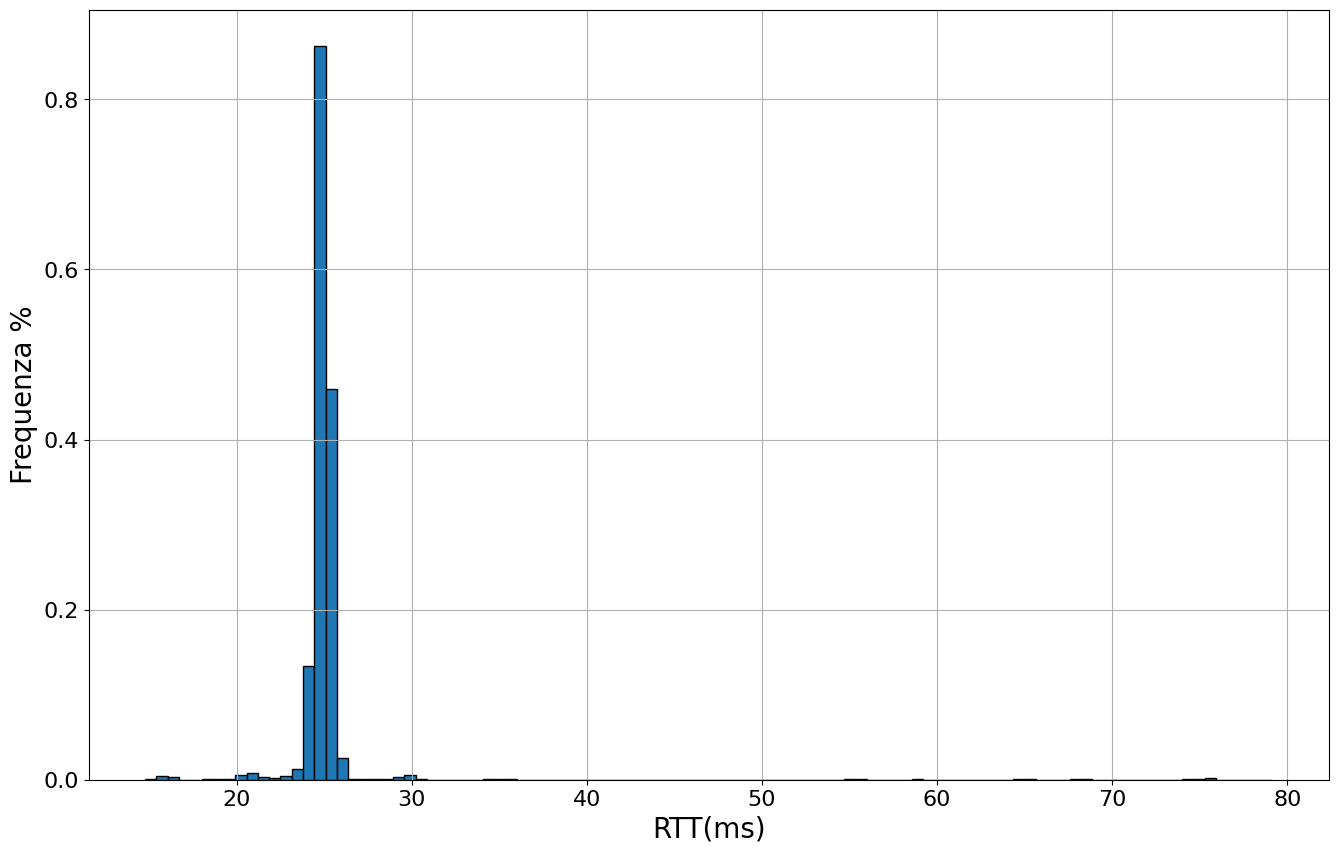

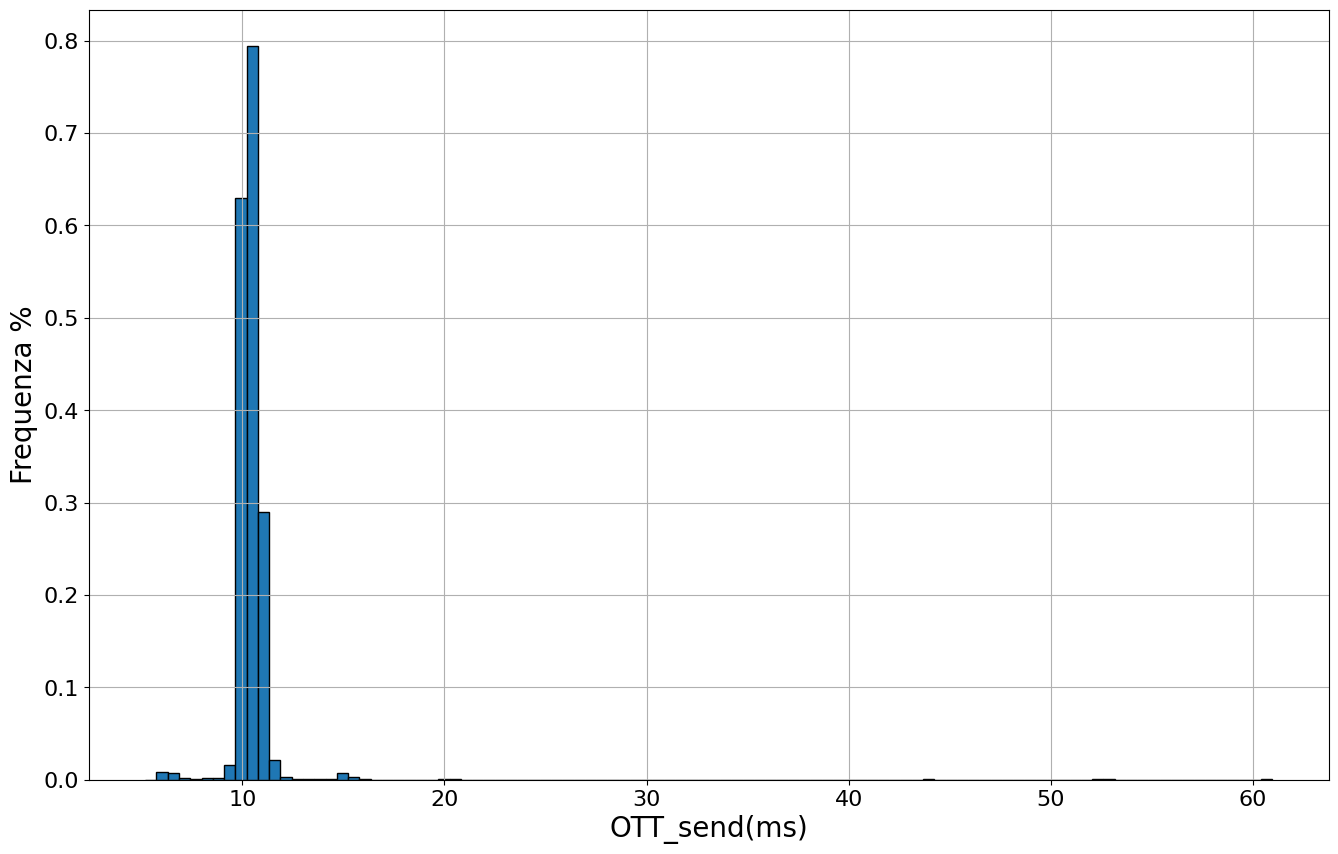

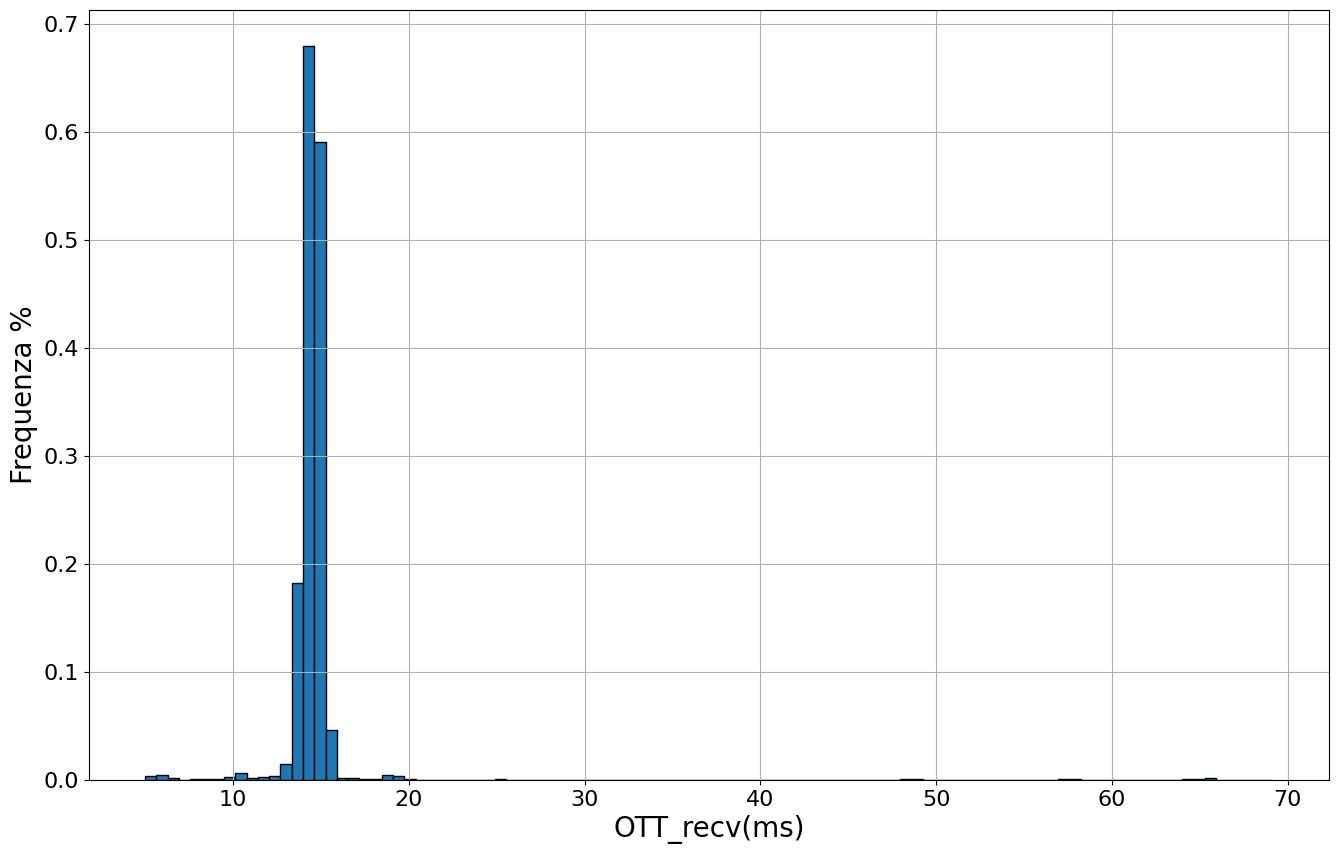

In [275]:
# Rappresentazione dei valori ottenuti:

#Istogramma RTT
plt.figure(figsize=(16,10))
n,bins,patches=plt.hist(df1['RTT'],density=True,bins=100,edgecolor='black')
plt.grid(True)
plt.xlabel('RTT(ms)',fontsize=20)
plt.ylabel('Frequenza %',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#Istogramma OTT_send
plt.figure(figsize=(16,10))
n,bins,patches=plt.hist(df1['OTT_send'],density=True,bins=100,edgecolor='black')
plt.grid(True)
plt.xlabel('OTT_send(ms)',fontsize=20)
plt.ylabel('Frequenza %',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

#Istogramma OTT_recv
plt.figure(figsize=(16,10))
n,bins,patches=plt.hist(df1['OTT_recv'],density=True,bins=100,edgecolor='black')
plt.grid(True)
plt.xlabel('OTT_recv(ms)',fontsize=20)
plt.ylabel('Frequenza %',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Risultati ottenuti:
I risultati ottenuti mostrano sempre la distribuzione multimodale ottenuta precedentemte, causata dall'esecuzione dei programmi python di client e server. Tuttavia avendo aumentato maggiormente il numero dei test effettuati, è stato osservato come tale comportamento venga "attenuato" e prevale la distribuzione normale, in tutte e tre le metriche, osservata anche tramite l'utilizzo del comando ping.

C:\Users\enric\AppData\Local\Temp\ipykernel_23320\3740708999.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path,header=None,delim_whitespace=True)


      CONTAINER ID           NAME    CPU %  MEM USAGE / LIMIT  MEM %  \
1     4359e12d5d64    nms-api-app    1.87%  47.43MiB/31.09GiB  0.15%   
2     83d0496cd3f3  nms-front-app    0.00%   27.8MiB/31.09GiB  0.09%   
3     1d8edff61cb4     nms-db-sql  100.03%  758.5MiB/31.09GiB  2.38%   
4     a89bf687d13c        r_agent    0.11%  138.9MiB/31.09GiB  0.44%   
6     4359e12d5d64    nms-api-app    1.77%  46.94MiB/31.09GiB  0.15%   
...            ...            ...      ...                ...    ...   
1860  b2bc12d8ebed     oai-ext-dn    0.00%  13.14MiB/31.09GiB  0.04%   
1861  4359e12d5d64    nms-api-app    1.21%  46.89MiB/31.09GiB  0.15%   
1862  83d0496cd3f3  nms-front-app    0.00%     28MiB/31.09GiB  0.09%   
1863  1d8edff61cb4     nms-db-sql  152.82%  764.4MiB/31.09GiB  2.40%   
1864  a89bf687d13c        r_agent    0.35%  140.1MiB/31.09GiB  0.44%   

            NET I/O     BLOCK I/O PIDS  
1             0B/0B     37.3MB/0B    6  
2     26.5kB/9.79kB  12.3MB/4.1kB   25  
3     30.4MB

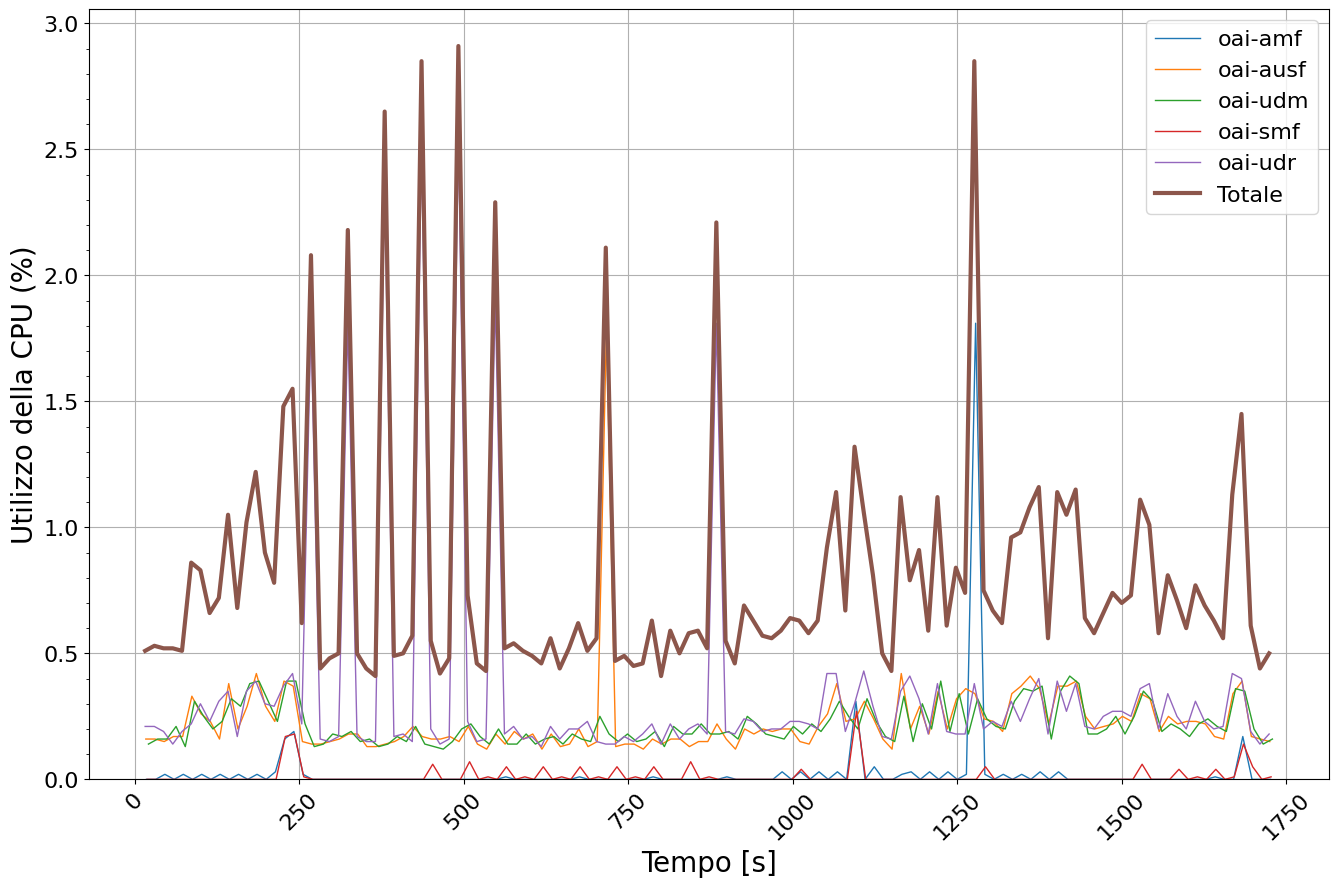

     index  MEM %
0       18   0.02
1       32   0.02
2       46   0.03
3       60   0.03
4       74   0.04
..     ...    ...
118   1670   0.07
119   1684   0.07
120   1698   0.07
121   1712   0.07
122   1726   0.07

[123 rows x 2 columns]
0      0.02
1      0.02
2      0.03
3      0.03
4      0.04
       ... 
118    0.07
119    0.07
120    0.07
121    0.07
122    0.07
Name: MEM %, Length: 123, dtype: float64
     index  MEM %
0       17   0.01
1       31   0.02
2       45   0.02
3       59   0.02
4       73   0.03
..     ...    ...
118   1669   0.06
119   1683   0.06
120   1697   0.06
121   1711   0.06
122   1725   0.06

[123 rows x 2 columns]
0      0.03
1      0.04
2      0.05
3      0.05
4      0.07
       ... 
118    0.13
119    0.13
120    0.13
121    0.13
122    0.13
Name: MEM %, Length: 123, dtype: float64
     index  MEM %
0       21   0.01
1       35   0.02
2       49   0.02
3       63   0.02
4       77   0.03
..     ...    ...
118   1673   0.06
119   1687   0.06
120   1701  

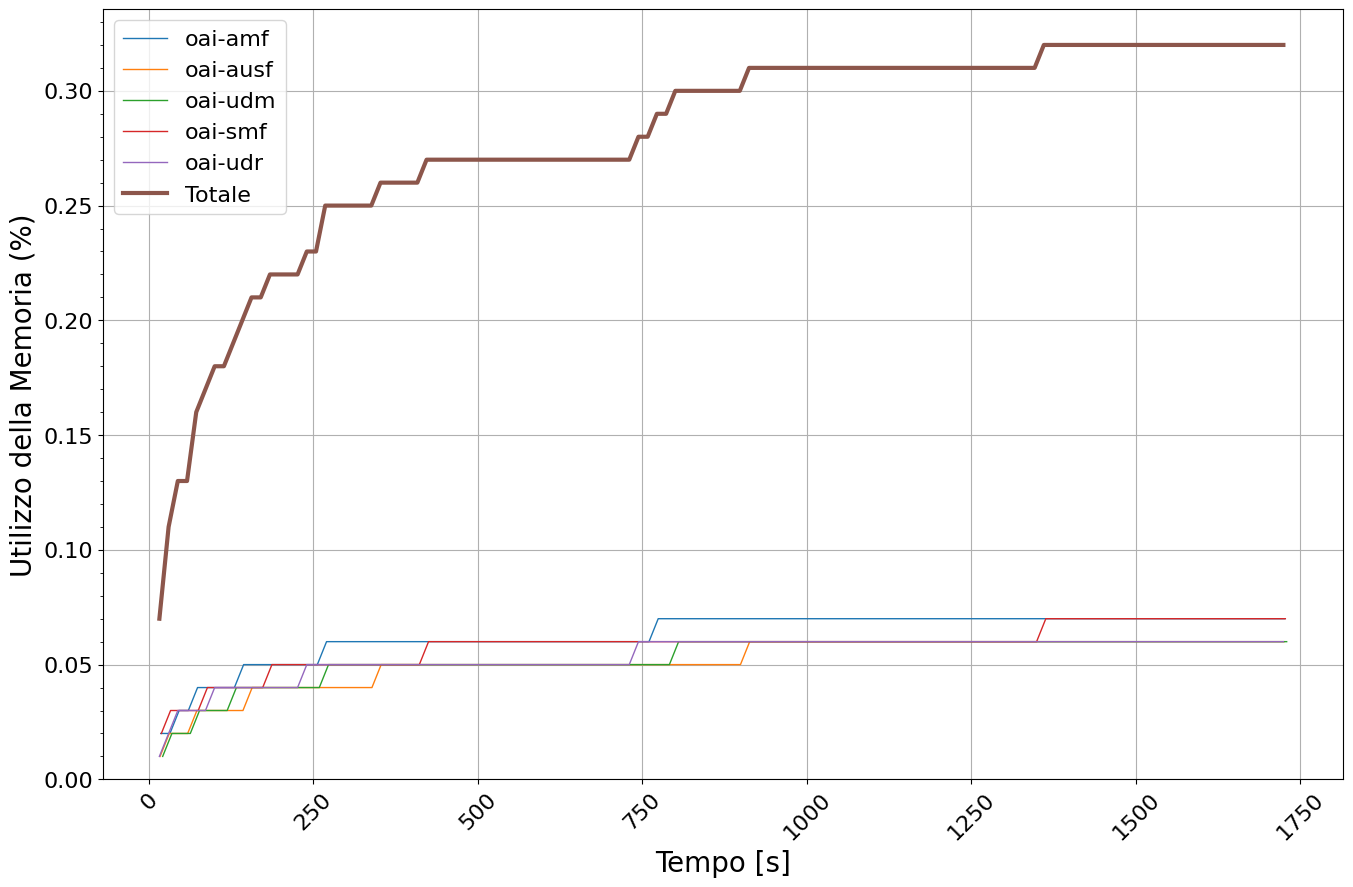

In [278]:
# Analisi del file contenente i valori di "docker stats":
# Tale file contiente l'andamento dei container che implementano l'infrastruttura di rete 5G durante la registrazione di 6 dispositivi utente. 
# Oltre all'andamento dei container è stato anche analizzato il traffico tramite wireshark che verr discusso successivamente.
# Funzione per analizzare una singola riga del file docker stats
# Lista per contenere tutte le osservazioni
# Funzione per analizzare una singola riga del file docker stats
import pandas as pd


# Leggi il file senza specificare un'intestazione (tutte le righe saranno caricate)
file_path = "test_18_11_2024/utilizzo_container.log"
df = pd.read_csv(file_path,header=None,delim_whitespace=True)

# Filtra le righe eliminando quelle che contengono l'intestazione ripetuta
# Supponendo che "CONTAINER ID" sia un identificativo chiaro dell'intestazione
df = df[~df[0].str.contains("CONTAINERID", na=False)]

# Aggiungi manualmente l'intestazione originale se necessario
df.columns = ["CONTAINER ID", "NAME", "CPU %", "MEM USAGE / LIMIT","MEM %", "NET I/O", "BLOCK I/O", "PIDS"]

# Esamina i risultati
print(df)
df.to_csv("docker_stats.csv", index=False)
df = pd.read_csv("docker_stats.csv")
df['CPU %']=df["CPU %"].str.rstrip('%').astype(float)
df['MEM %']=df["MEM %"].str.rstrip('%').astype(float)
# Grafico dell'utilizzo della CPU nel tempo per ciascun container
nf=['oai-amf','oai-ausf','oai-udm','oai-smf','oai-udr']
plt.figure(figsize=(16, 10))
tot=0
for container in nf:   
    container_data = df[df["NAME"] == container]
    plt.plot(container_data.index, container_data["CPU %"], label=container,linewidth=1)
    app=container_data['CPU %']
    app=app.reset_index()
    print(app)
    tot=tot+app['CPU %']
    print(tot)

plt.plot(container_data.index,tot,label='Totale',linewidth=3)
plt.xlabel("Tempo [s]", fontsize=20)
plt.ylabel("Utilizzo della CPU (%)", fontsize=20)
plt.legend(fontsize=16)
plt.xticks(rotation=45)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.1))
plt.grid(True)
plt.show()
plt.figure(figsize=(16, 10))
totmem=0
for container in nf:   
    container_data = df[df["NAME"] == container]
    plt.plot(container_data.index, container_data["MEM %"], label=container,linewidth=1)
    app=container_data['MEM %']
    app=app.reset_index()
    print(app)
    totmem=totmem+app['MEM %']
    print(totmem)

plt.plot(container_data.index,totmem,label='Totale',linewidth=3)
plt.xlabel("Tempo [s]", fontsize=20)
plt.ylabel("Utilizzo della Memoria (%)", fontsize=20)
plt.legend(fontsize=16)
plt.xticks(rotation=45)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(bottom=0)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.01))
plt.grid(True)
plt.show()

## Risultati "docker stats"
I risultati mostrano come sia evidente l'utilizzo delle risorse crescente (per quanto riguarda la memoria) man mano che i vari dispositivi utente si collegano alla rete. 
Inoltre è presente il tentativo non riuscito che ha mandato in errore il sistema e fatto arrestare la SDR. Infatti dall'istante t=250s è possibile osservare, guardando l'andamento della CPU i 6 picchi distinti che rappresentano i dispositivi utente che si sono collegati. 

In [279]:
import pyshark


from scapy.all import rdpcap

# Leggi il file pcapng
path="test_18_11_2024/cattura_rete.pcapng"
packets = rdpcap(path)

# Dati per memorizzare traffico per dispositivo
device_traffic = {}

# Analizza i pacchetti
for pkt in packets:
    if pkt.haslayer('IP'):  # Considera solo pacchetti IP
        ip_src = pkt['IP'].src
        ip_dst = pkt['IP'].dst
        pkt_len = len(pkt)

        # Aggiorna il traffico per ciascun IP
        device_traffic[ip_src] = device_traffic.get(ip_src, 0) + pkt_len
        device_traffic[ip_dst] = device_traffic.get(ip_dst, 0) + pkt_len

# Mostra i risultati
for device, traffic in device_traffic.items():
    print(f"Dispositivo: {device}, Traffico: {traffic} bytes")


Dispositivo: 10.22.255.116, Traffico: 5234 bytes
Dispositivo: 10.22.255.255, Traffico: 882357 bytes
Dispositivo: 10.22.27.103, Traffico: 32820 bytes
Dispositivo: 255.255.255.255, Traffico: 353914 bytes
Dispositivo: 10.22.0.46, Traffico: 112896 bytes
Dispositivo: 10.22.0.42, Traffico: 133284 bytes
Dispositivo: 10.22.0.43, Traffico: 133458 bytes
Dispositivo: 10.22.0.44, Traffico: 133458 bytes
Dispositivo: 10.22.255.127, Traffico: 7168 bytes
Dispositivo: 10.22.255.65, Traffico: 33360 bytes
Dispositivo: 10.22.0.41, Traffico: 141600 bytes
Dispositivo: 10.22.0.45, Traffico: 112749 bytes
Dispositivo: 10.22.27.101, Traffico: 33120 bytes
Dispositivo: 10.22.255.202, Traffico: 34205 bytes
Dispositivo: 10.22.27.104, Traffico: 32655 bytes
Dispositivo: 10.22.255.219, Traffico: 45565 bytes
Dispositivo: 10.22.255.188, Traffico: 11138 bytes
Dispositivo: 10.22.0.32, Traffico: 14592 bytes
Dispositivo: 10.22.255.143, Traffico: 34924 bytes
Dispositivo: 51.178.91.233, Traffico: 10032 bytes
Dispositivo: 10.2